In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import csv
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import pandas as pd


In [4]:
data = open('../data/data.csv', 'r').readlines()
fieldnames = ['x', 'y', 'z', 'unmasked', 'synapses']
reader = csv.reader(data)
reader.next()

rows = [[int(col) for col in row] for row in reader]

In [5]:
df = pd.DataFrame(rows)

In [6]:
df.columns = ['x', 'y', 'z', 'unmasked', 'synDen']

In [7]:
df = df[df.unmasked != 0]
df = df[df.synDen != 0]


In [8]:
df['synDen'] = df['synDen']/df['unmasked']

In [9]:
synData = df['synDen'].reshape(-1,1)
print synData

[[ 0.00113788]
 [ 0.00021915]
 [ 0.00088586]
 ..., 
 [ 0.00065746]
 [ 0.00043831]
 [ 0.00070205]]


In [10]:
from sklearn.cluster import KMeans


In [21]:
k_range = range(1,26)
k_means_var = [KMeans(n_clusters = k).fit(synData) for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]

In [22]:
print k_means_var

[KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=1, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0), KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=6, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0

In [23]:
from scipy.spatial import distance
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

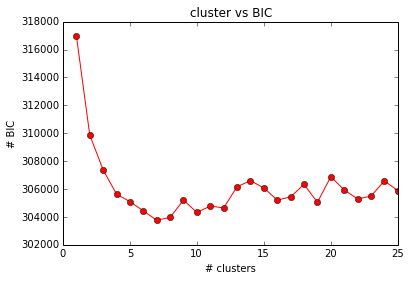

In [24]:
BIC = [compute_bic(kmeansi ,synData) for kmeansi in k_means_var]
plt.plot(k_range,BIC,'r-o')
plt.title("cluster vs BIC")
plt.xlabel("# clusters")
plt.ylabel("# BIC")

#Code From: http://www.slideshare.net/SarahGuido/kmeans-clustering-with-scikitlearn
#Code From: http://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans


In [25]:
#optimum number of clusters is 6 looking at the elbow of the graph

In [27]:
km = KMeans(n_clusters = 6)
km.fit(synData)
labels = km.labels_
df['clusterGroup'] = labels

print df

          x     y     z  unmasked    synDen  clusterGroup
5        19  1369   610     14940  0.001138             2
9        19  1369  1054      4563  0.000219             0
16       19  1408   610     14675  0.000886             2
22       19  1447    55      4856  0.000206             0
27       19  1447   610     14396  0.001111             2
38       19  1486   610     14009  0.001499             4
42       19  1486  1054      4563  0.000219             0
49       19  1525   610     13810  0.001231             1
60       19  1564   610     13271  0.000904             2
71       19  1603   610     13073  0.000306             0
77       19  1642    55      7943  0.000252             0
82       19  1642   610     12743  0.000157             0
88       19  1681    55      8490  0.000236             0
93       19  1681   610     11616  0.000172             0
99       19  1720    55      9468  0.000211             0
104      19  1720   610     10081  0.000397             0
110      19  1